In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-data-set/student-por.csv


In [2]:
datalink = '/kaggle/input/student-performance-data-set/student-por.csv'

In [3]:
df = pd.read_csv(datalink)

In [4]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


Exploratory Analysis and Visualization

In [7]:
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
import seaborn as sns
%matplotlib inline

In [8]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [9]:
df['absences'].describe()

count    649.000000
mean       3.659476
std        4.640759
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       32.000000
Name: absences, dtype: float64

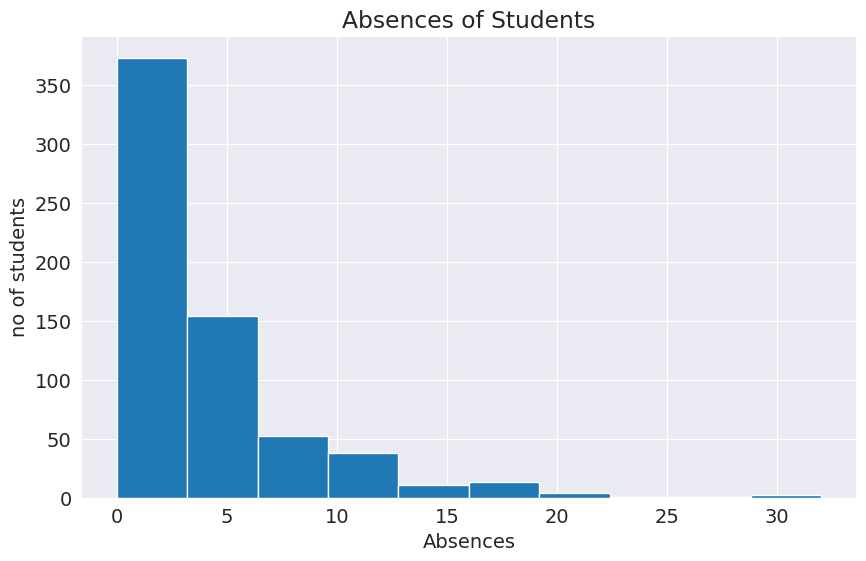

In [10]:
plt.hist(df['absences'])
plt.title('Absences of Students')
plt.xlabel('Absences')
plt.ylabel('no of students')
plt.show()


In [11]:
fig =px.histogram(df,
                  x ='absences',
                 marginal ='box',
                 title='Absences of students')
fig.update_layout(bargap =0.1)
fig.show()

In [12]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [13]:
df['absences'].corr(df['G1'])



-0.1471492417639844

In [14]:
df['absences'].corr(df['G2'])

-0.12474493347142715

In [15]:
df['absences'].corr(df['G3'])

-0.0913790564387561

we see that absences are negatively correlated so more absences have less grades in every test G1, G2, G3

In [16]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [17]:
fig = px.histogram(df,
                  x ='health',
                  title ='Distribution of health',
                  marginal ='box',
                  )
fig.show()

In [18]:
df['health'].corr(df['G2'])

-0.08217908362558937

In [19]:
df['health'].corr(df['G1'])

-0.051647415072845884

Here are some possible reasons for negative correlation:

Time Trade-Off: Healthier students might be spending more time on sports or physical activities, which could reduce study time and impact grades.

Social Factors: Students with active social or extracurricular lives might prioritize those activities, which may contribute to good health but might not leave as much time for studying.

Other Underlying Factors: Health and academic performance could both be influenced by a third factor (like family environment, motivation, or socioeconomic status), which can create a correlation without one necessarily causing the other.

In [20]:
fig = px.histogram(df,
                   x ='Medu', y ='G1',
                   color ='sex', 
                   color_discrete_sequence =['green','grey'], 
                   title ='Mother Education, student grades and sex')
fig.show()


seems like the students who have educated mothers have been scoring good in exams

In [21]:
df['G1'].value_counts()

G1
10    95
11    91
12    82
13    72
14    71
9     65
8     42
15    35
7     33
16    22
17    16
6      9
18     7
5      5
4      2
0      1
19     1
Name: count, dtype: int64

In [22]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [23]:
df['goout'].corr(df['G2'])

-0.07946919397288801

In [24]:
df['goout'].corr(df['G1'])

-0.07405263312184832

In [25]:
df['goout'].corr(df['G3'])

-0.08764072272424214

seems like students who go out frequently have scored less in tests

In [26]:
def corr_of_columns(col1, col2):
    print(col1.corr(col2))
    

In [27]:
corr_of_columns(df['Fedu'], df['G2'])

0.225138929652171


In [28]:
corr_of_columns(df['Fedu'], df['G3'])

0.21179967911445205


In [29]:
corr_of_columns(df['Fedu'], df['G1'])

0.21750065064752377


positive correlation between Father's education and scores in the tests, means educated parents have good scoring 
students


In [30]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [31]:
corr_of_columns(df['Dalc'], df['G1'])
corr_of_columns(df['Walc'], df['G1'])
corr_of_columns(df['famrel'], df['G1'])
corr_of_columns(df['studytime'], df['G1'])

-0.19517093419289133
-0.15564948637866244
0.04879460349123031
0.26087538031319024


In [32]:
corr_of_columns(df['Dalc'], df['G2'])
corr_of_columns(df['Walc'], df['G2'])
corr_of_columns(df['famrel'], df['G2'])
corr_of_columns(df['studytime'], df['G2'])

-0.18947993515773703
-0.1648521867672081
0.08958778299759312
0.24049799907999134


the student who have more study time have good scores, family relationships have almost no impact on scores, alcohol consumption have a bit of negative correlation

In [33]:
fig = px.scatter(df,
                x ='Walc',
                y ='G1',
                title ='weekend alcohol vs G1 scores',
                color ='romantic',
                opacity =0.8,
                )
fig.update_traces(marker_size=5)
fig.show()

In [34]:
fig = px.scatter(df,
                x ='Dalc',
                y ='G1',
                title ='Workday alcohol vs G1 scores',
                color ='romantic',
                opacity =0.8,
                )
fig.update_traces(marker_size=5)
fig.show()

In [35]:
df.columns.unique()

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [36]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [38]:
corr_of_columns(df['failures'], df['G2'])
corr_of_columns(df['traveltime'], df['G2'])
corr_of_columns(df['freetime'], df['G2'])


-0.3857822152318822
-0.15448887058863822
-0.10667792651255555


no of failures has quiet strong correlation between scores

In [39]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


To compute the correlation for categorical columns, they must first be converted into numeric columns.

In [40]:
romantic_rel = {'no': 0, 'yes': 1}
romantic_numeric = df.romantic.map(romantic_rel)
df['G1'].corr(romantic_numeric)

-0.07497288119974731

In [41]:
internet_val = {'no':0, 'yes': 1}
internet_numeric = df.internet.map(internet_val)
df['G1'].corr(internet_numeric)

0.13993051274728235

In [42]:
higher_studies_val = {'no': 0, 'yes': 1}
higher_studies_numeric = df['higher'].map(higher_studies_val)
df['G1'].corr(higher_studies_numeric)

0.3490301134412209

students who want to go for higher studies scored good marks in G1 test

In [43]:
def cat_to_num(df, column, Gno):
    column_val = {'no': 0, 'yes': 1}
    column_numeric = df[column].map(column_val)
    return df[Gno].corr(column_numeric)

this is the function to calculate yes and no columns correlation with the tests G1, G2, G3

In [44]:
cat_to_num(df, 'nursery','G1')

0.031171557655061154

students who attended nursery school have good scores


In [45]:
cat_to_num(df, 'nursery','G2')

0.039867334254666605

In [46]:
cat_to_num(df, 'nursery','G3')

0.02875235931905979

In [47]:
cat_to_num(df, 'higher', 'G1')



0.3490301134412209

In [48]:
cat_to_num(df, 'higher','G2')

0.331952986646495

In [49]:
cat_to_num(df, 'higher','G3')

0.33217159086736114

In [50]:
cat_to_num(df, 'activities', 'G1')

0.08012316046929399

In [51]:
cat_to_num(df, 'activities', 'G2')

0.06715365536871923

In [52]:
cat_to_num(df, 'activities', 'G3')

0.059791450427086563

In [53]:
cat_to_num(df, 'paid', 'G1')

-0.0627835539104602

In [54]:
print(cat_to_num(df, 'famsup', 'G1'))
print(cat_to_num(df, 'famsup', 'G2'))
print(cat_to_num(df, 'famsup', 'G3'))

0.03825522796734794
0.03814096254061578
0.059205555545787686


In [55]:

print(cat_to_num(df, 'schoolsup', 'G1'))
print(cat_to_num(df, 'schoolsup', 'G2'))
print(cat_to_num(df, 'schoolsup', 'G3'))

-0.07177894143044505
-0.056623634768405304
-0.06640474759529727


so what we infer from this dataset till now:
* we see that absences are negatively correlated so more absences have less grades in every test G1, G2, G3
* seems like students who go out frequently have scored less in tests
* positive correlation between Father's education and scores in the tests, means educated parents have good scoring students
* the student who have more study time have good scores, family relationships have almost no impact on scores, alcohol consumption have a bit of negative correlation
* no of failures has quiet strong correlation between scores
* students who want to go for higher studies scored good marks in G1 test
* students who attended nursery school have good scores


i will try to make the model on the basis of parents education, higher studies, study time and past failures as they have affected the scores most

Linear Regression using a Single Feature

We now know that the "Higher Studies" and "failures" columns have the strongest correlation with "scores".Let's try to find a way of estimating the value of "scores" using the value of "Higher Studies" . First, let's create a data frame containing just the data for "Higher Studies".

In [56]:
higher_yes_df = df[df['higher'] == 'yes']
higher_yes_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


Next, let's visualize the relationship between "failures" and "G2"

In [57]:
df.columns.unique()

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

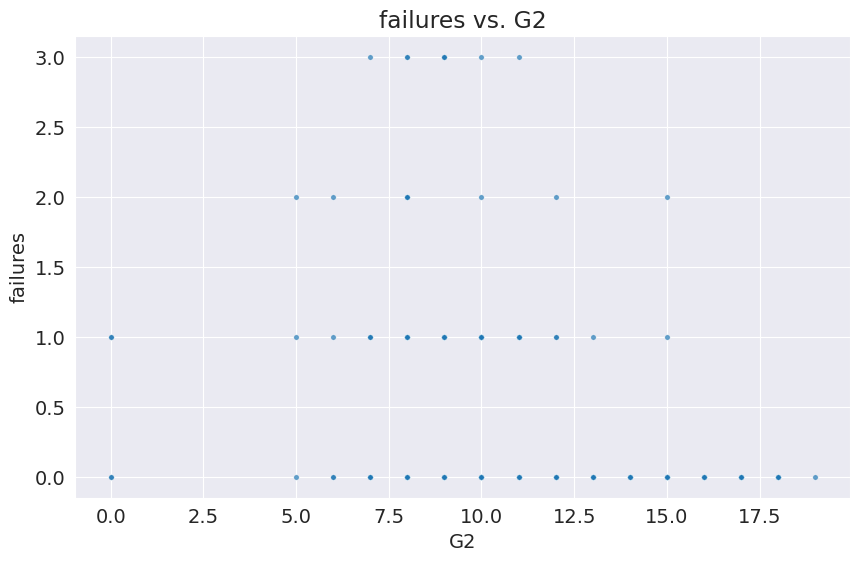

In [58]:
plt.title('failures vs. G2')
sns.scatterplot(higher_yes_df, x='G2', y='failures', alpha=0.7, s=15);

scores= w × failure + b

We'll try determine w and b for the line that best fits the data.

This technique is called linear regression, and we call the above equation a linear regression model, because it models the relationship between "failure" and "scores of G2" as a straight line.

The numbers 
w and b are called the parameters or weights of the model.

The values in the "failure" column of the dataset are called the inputs to the model and the values in the G2 column are called "targets".

In [63]:
# scores= w × failures + b

def estimate_scores(failures, w, b):
    return w * failures + b


In [64]:
w = 50
b = 100

In [69]:
fail = higher_yes_df['failures']
estimated_scores = estimate_scores(fail, w, b)

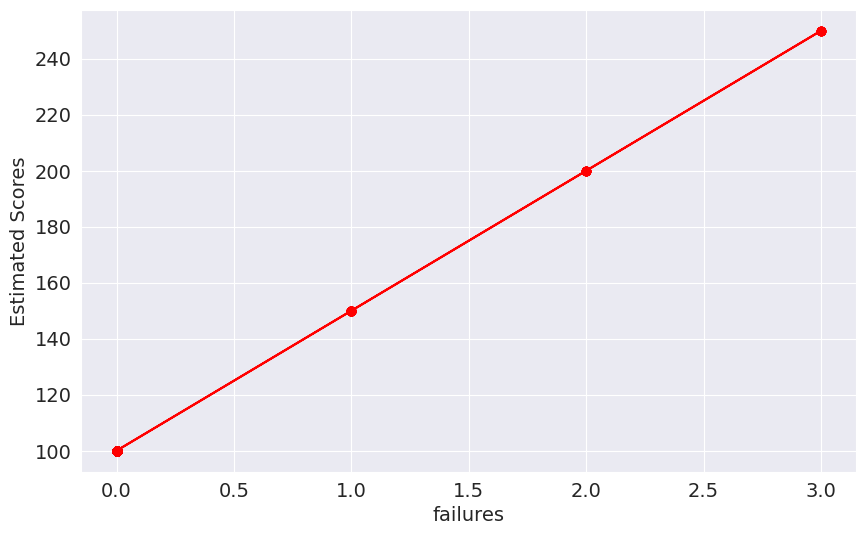

In [80]:
plt.figure(figsize=(10,6))
plt.plot(fail, estimated_scores, 'r-o')
plt.xlabel('failures')
plt.ylabel('Estimated Scores')
plt.show();

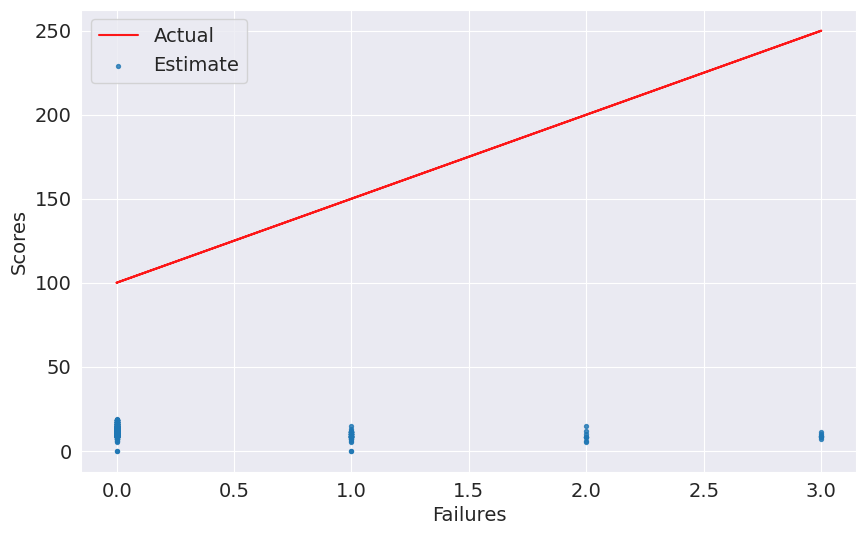

In [84]:
target = higher_yes_df.G2
plt.plot(fail, estimated_scores, 'r', alpha =0.9)
plt.scatter(fail, target, s=8, alpha =0.8)
plt.xlabel('Failures')
plt.ylabel('Scores')
plt.legend(['Estimate', 'Actual']);

Clearly, the our estimates are quite poor and the line does not "fit" the data. However, we can try different values of 
w and b to move the line around.

In [93]:
def try_parameters(w, b):
    fail = higher_yes_df.failures
    target = higher_yes_df.G2
    
    estimated_scores = estimate_scores(fail, w, b)
    
    plt.plot(fail, estimated_scores, 'r', alpha=0.9);
    plt.scatter(fail, target, s=8,alpha=0.8);
    plt.xlabel('failures');
    plt.ylabel('Scores')
    plt.legend(['Estimate', 'Actual']);
 

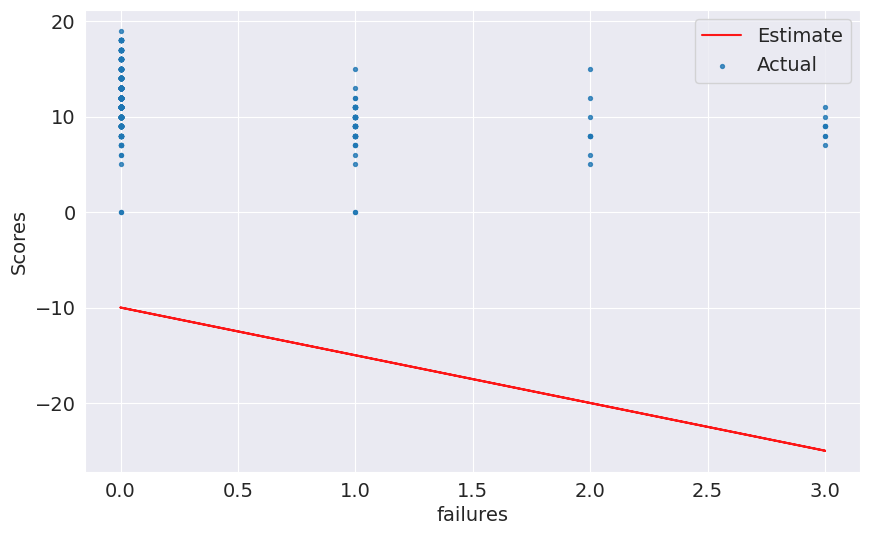

In [95]:
try_parameters(-5,-10)

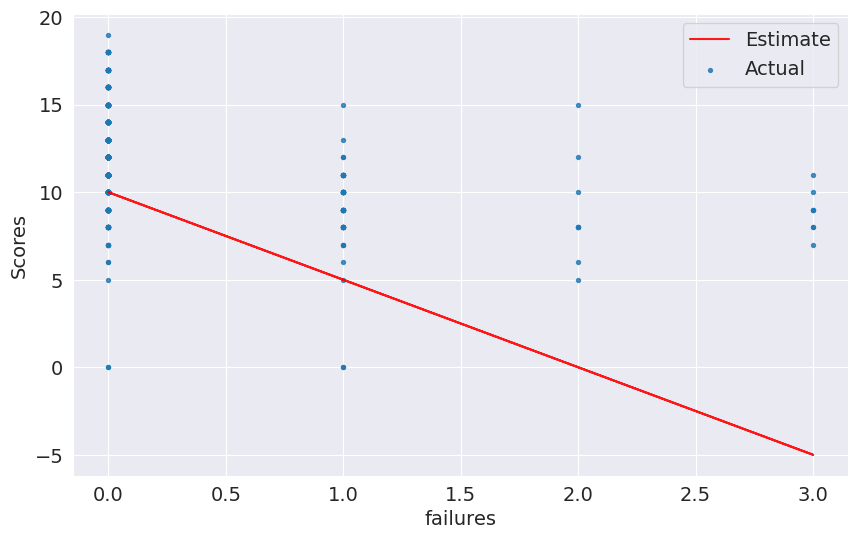

In [96]:
try_parameters(-5,10)

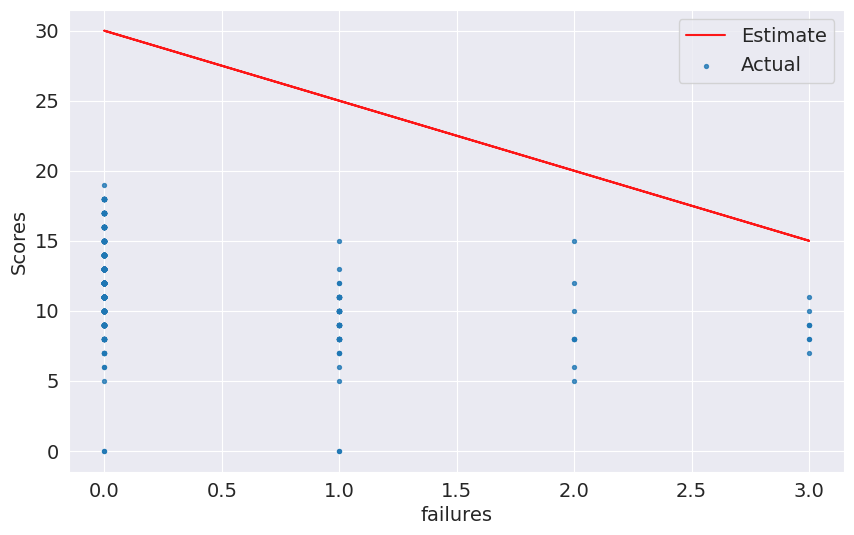

In [97]:
try_parameters(-5,30)

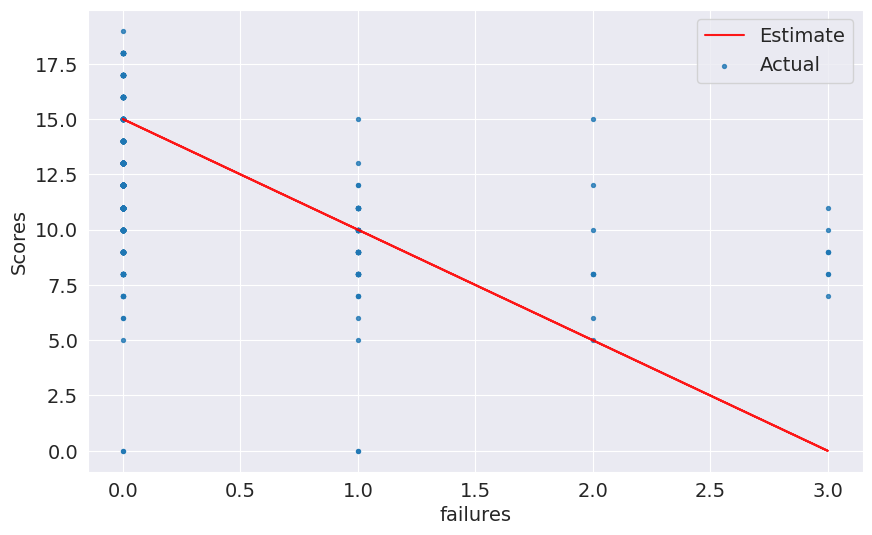

In [98]:
try_parameters(-5,15)

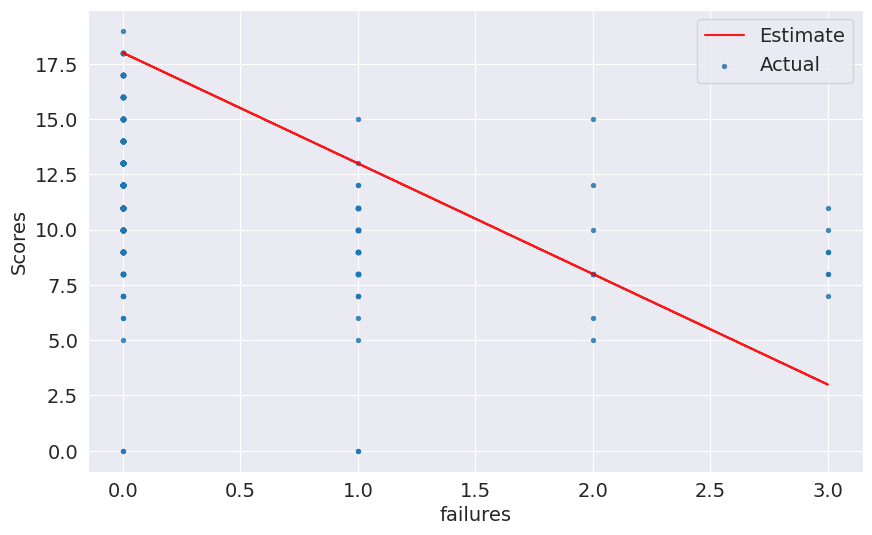

In [99]:
try_parameters(-5,18)

In [100]:
import numpy as np

In [101]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [102]:
w = 50
b = 100

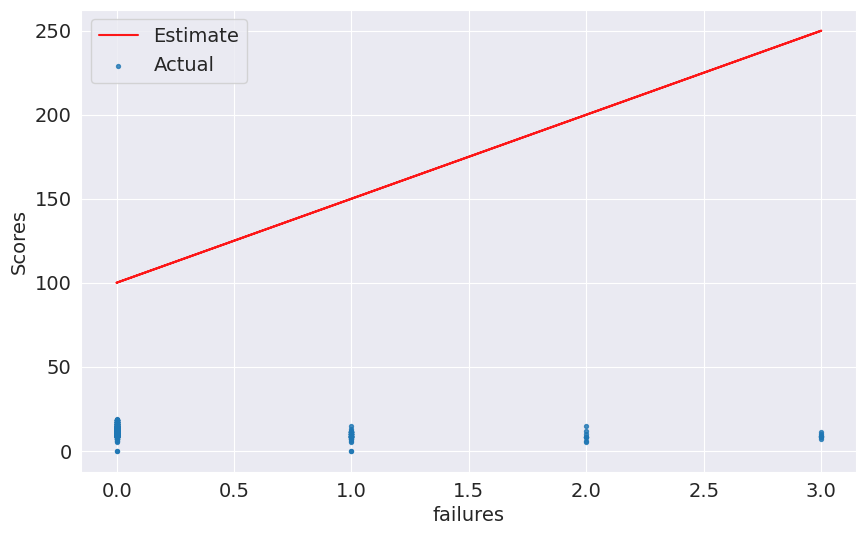

In [103]:
try_parameters(w, b)

In [104]:
w = -5
b = 18

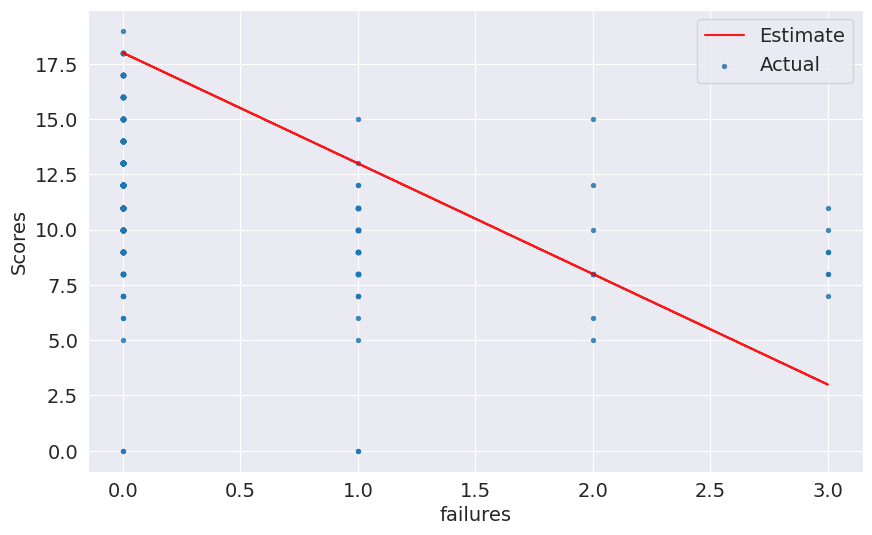

In [105]:
try_parameters(w, b)

In [107]:
target = higher_yes_df.G2
predicted = estimate_scores(higher_yes_df.failures, w, b)


In [108]:
rmse(target, predicted)

6.118372558010887

In [119]:
def try_parameters(w, b):
    fail = higher_yes_df.failures
    target = higher_yes_df.G2
    
    estimated_scores = estimate_scores(fail, w, b)
    
    plt.plot(fail, predicted, 'r', alpha=0.9);
    plt.scatter(fail, target, s=8,alpha=0.8);
    plt.xlabel('failures');
    plt.ylabel('Scores')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predicted)
    print('RMSE Loss: ', loss)

 

RMSE Loss:  6.118372558010887


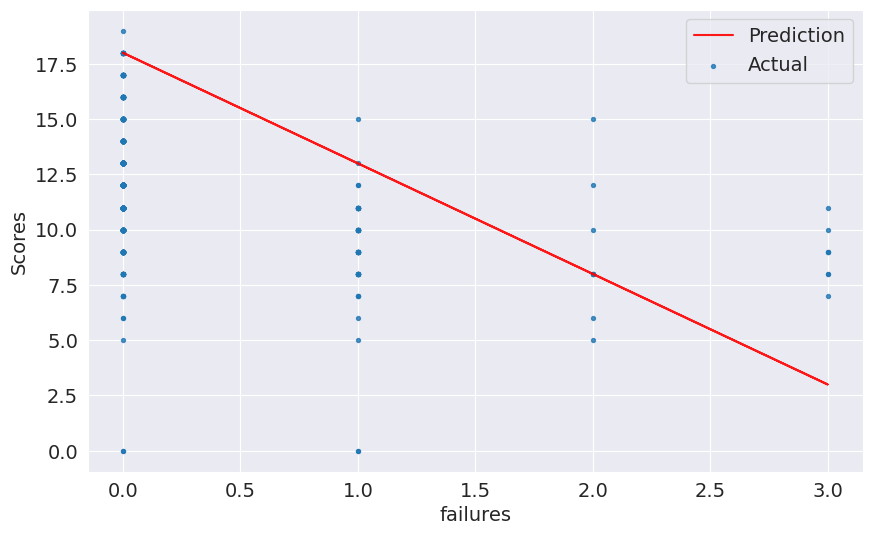

In [120]:
try_parameters(50, 100)

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
model  = LinearRegression()

Next, we can use the fit method of the model to find the best fit line for the inputs and targets.

In [139]:
# Note that the input X must be a 2-d array
inputs = higher_yes_df[['failures']]
targets = higher_yes_df.G2
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (580, 1)
targes.shape : (580,)


In [140]:
model.fit(inputs, targets)

LinearRegression()

We can now make predictions using the model. Let's try predicting the charges for the failures 1, 2 and 4

In [131]:
higher_yes_df.failures.unique()

array([0, 3, 1, 2])

In [133]:
model.predict(np.array([[1],
                        [2],
                        [4]]))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([10.33625084,  8.47359815,  4.74829278])

model predicted if a student has 1 failure then he scores 10.33, is student has 2 failures then 8 and if 4 then score would be 4,7

In [170]:
model.predict(np.array([[2]]))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([8.20102159])

In [169]:
higher_yes_df[higher_yes_df['failures'] == 2][['G2', 'failures']]

,G2,failures
146,10,2
173,8,2
175,6,2
351,15,2
370,8,2
407,12,2
572,5,2
581,8,2
590,8,2


students who want to go for higher studies and who failed 2 times are total 9 and out  of them 4 have scored 8 

Now lets have a look at the same predictions but in full dataframe and not just on the students who r going to higher studies

In [141]:
# inputs should be in 2D array
inputs = df[['failures']]
targets = df.G2

print('Inputs.shape: ', inputs.shape)
print('Targets.shape: ', targets.shape)


Inputs.shape:  (649, 1)
Targets.shape:  (649,)


In [143]:

print(649 - 548)

101


In [144]:
model.fit(inputs, targets)


LinearRegression()

In [150]:
model.predict(np.array([[2],
                       [3],
                       [6]]))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([8.20102159, 6.30627551, 0.62203724])

In [167]:
model.predict(np.array([[2]]))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([8.20102159])

In [166]:
df[df['failures'] == 2][['G2', 'failures']]

,G2,failures
127,10,2
146,10,2
163,9,2
173,8,2
175,6,2
284,8,2
351,15,2
370,8,2
407,12,2
413,10,2


6 out of 16